<a href="https://colab.research.google.com/github/FacuBelisario/Tesis-MSE/blob/master/SistemasDeControl/SistemaDeControlPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Satélite para Determinación y Control del Eje-Yaw usando un Compensador PID

Mbaocha C. C, Eze C. U, Ezenugu I. A, Onwumere J. C.



A continuación se presenta el desarrollo de un controlador PID diseñado como compensador para una entrada escalón de un ángulo sobre el eje-yaw del cuerpo de un satélite mediante la posición angular precisa de un motor DC con la respuesta óptima permitida. Dicho desarrollo se obtuvo de un paper publicado por los autores mencionados más arriba.

Este paper presenta un modelo matemático completo de un sistema de control para un satélite en Low Earth Orbit (LEO) y un motor DC ha sido seleccionado técnicamente como los elementos actuantes para rotar el cuerpo del satélite al ángulo de guiñada (yaw) deseado.

El control de actitud significa colocar al satélite en una dirección prederteminada específica, lo cual consiste en una maniobra de control y estabilización de actitud.

Luego, el satélite es asumido como un cuerpo rigido operando sin fricción en el espacio y con perturbaciones. Como resultado de estas perturbaciones, a lo largo del tiempo el satélite se desviará del ángulo de actitud deseado $\theta (t)$. Por lo tanto, debe ser diseñado un sistema de control que sea capaz de regresar y manetener al satélite en sus ángulo de actitud deseado, por ejemplo, $\theta (t) = 0$. Además, la respuesta del sistema de control debe ser tan rápida como sea posible, con un minimo sobrepaso (overshoot) y error en estado estacionario nulo.

En la Figura 1 se puede ver la representación esquemática del sistema de control completo.

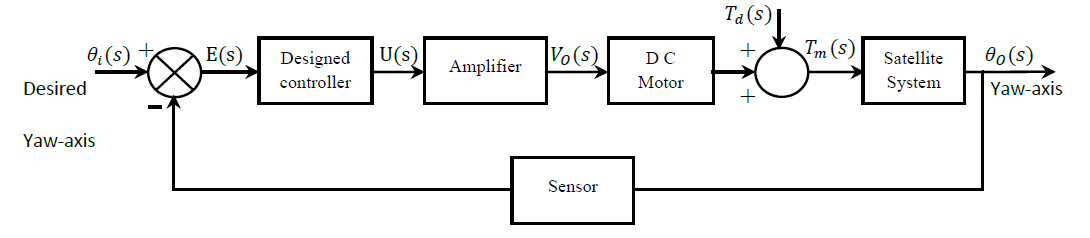

                                                                           
                Figura 1: Sistema de control de actitud del Eje-Yaw

# Especificaciones de Diseño

Las especificaciones de diseño de control son las siguientes:



*   El tiempo de asentamiento debe ser $\leq 2$ segundos,
*   El sobrepaso $\leq 5 \%$ y
*   error en estado estacionario nulo.



# Modelos matemáticos del Sistema de Control de Actitud del Satélite

A continuación se presentan los modelos de los elementos de control individuales (amplificador, motor DC y sistema del satélite) que se utilizarán para el desarrollo del modelo matemático completo del ADCS (Attitude Determination and Control System) del satélite.

**Modelo matemático del Amplificador**

El amplificador utilizado tiene una ganancia $k_{a}$ y el voltage de salida $V_{o}(s)$ es:

$$ V_{o}(s) = k_{a} V_{i}(s) $$

Luego, la función de transferencia de lazo abierto es:

$$ \dfrac{V_{o}(s)}{V_{i}(s)} = k_{a} $$

**Modelo matemático del motor DC**

El motor DC es el dispositivo actuador de potencia que entrega el torque de salida $T_{m}(s)$ desde el motor. La entrada es el voltage de salida del amplificador $V_{o}(s)$, el cual provee la corriente $I_{a}$ a la resistencia $R_{a}$ y a la inductancia $L_{a}$ de los devandados de la armadura.

El voltaje de entrada puede ser modelado en términos del campo o de los terminales de la armadura. En este caso, se hace uso del motor DC controlado por su armadura.

De la Figura 2 se puede deducir que, cuando una corriente de campo constante es establecida en la bobina del campo, el torque del motor $T_{m}(s) es:

$$ T_{m}(s) = K_{m} I_{a}(s) $$

Además, la corriente de la armadura se relaciona con el voltage de entrada aplicado a la armadura como:

$$ V_{a}(s) = (R_{a} + L_{a} S) I_{a}(s) + V_{b}(s) $$
donde $V_{b}(s)$ es el voltage de la fuerza contra-electromotriz (back electromotive force) proporcional a la velocidad del motor.

Por lo tanto, $V_{b}(s) = K_{b} \omega(s)$

Donde $\omega(s) = S \theta(s) $, la cual es la tranformada de la velocidad angular y por lo tanto, la corriente de la armadura es:

$$ I_{a}(s) = \dfrac{V_{a}(s) - K_{b} \omega(s)}{R_{a} + L_{a} S} $$

Por otro lado, el torque del motor $T_{m}(s)$ es igual al torque entregado a la carga, entonces:

$$ T_{m}(s) = T_{L}(s) + T_{d}(s) $$
donde $T_{d}(s)$ es el torque pertubador.

El torque de carga $T_{L}(s)$ para inercia rotante como se muestra en la Figura 2 es escrito como:

$$ T_{L}(s) = s(J s + b) \theta(s) $$

Por lo tanto, re-ordenando las ecuaciones, obtenemos:

$$T_{L}(s) = T_{m}(s) - T_{d}(s) = s(J s + b) \theta(s)$$

Para la mayoría de los motores DC, se tiene $ K_{m} = K_{b} = K$. Y, combinando las ecuaciones anteriores y haciendo $T_{d}(s) = 0$, se obtiene la función de transferencia del motor DC como:

$$ \dfrac{\theta(s)}{V_{o}(s)} = \dfrac{ K}{(J s + b) (R_{a} + L_{a} s) + K^{2}}$$

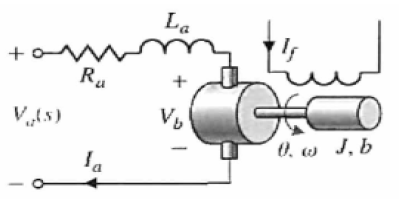

              Figura 2: Actuador rotacional de motor DC controlado por armadura


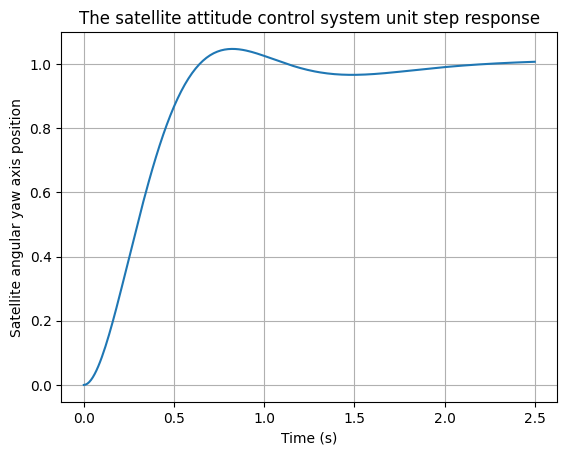

Solution found:
k = 21
a = 0.30000000000000004
Max overshoot = 1.047091345738962
Settling time = 1.8 sec


In [ ]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Definir el tiempo de simulación
t = np.arange(0, 2.51, 0.01)  # De 0 a 2.5 s con paso de 0.01 s

solution = None  # Para almacenar la solución final

# Bucle exterior: variando k de 40 a 2
for k in range(40, 1, -1):
    # Bucle interior: variando a de 0.5 a 0.05
    for a in np.arange(0.5, 0.0, -0.05):
        # Definir el numerador y denominador de la función de transferencia
        num = [0, 0, k, 2 * k * a, k * a**2]
        den = [1, 6, 5 + k, 2 * k * a, k * a**2]

        # Crear el sistema de control
        sys = ctrl.TransferFunction(num, den)

        # Obtener la respuesta al escalón
        t_out, y = ctrl.step_response(sys, t)

        # Calcular el máximo de la respuesta
        m = np.max(y)

        # Encontrar el tiempo de establecimiento (cuando y está entre 0.98 y 1.02)
        s = len(y) - 1  # Último índice
        while s > 0 and 0.98 < y[s] < 1.02:
            s -= 1

        ts = (s - 1) * 0.01  # Tiempo de establecimiento

        # Verificar la condición para romper el bucle interno
        if 1.00 < m < 1.05 and ts < 2.0:
            solution = [k, a, m, ts]
            break  # Sale del bucle interno

    # Verificar la condición para romper el bucle externo
    if solution:
        break  # Sale del bucle externo

# Graficar la respuesta al escalón
plt.plot(t_out, y)
plt.grid()
plt.title('The satellite attitude control system unit step response')
plt.xlabel('Time (s)')
plt.ylabel('Satellite angular yaw axis position')
plt.show()

# Imprimir la solución encontrada
if solution:
    print("Solution found:")
    print(f"k = {solution[0]}")
    print(f"a = {solution[1]}")
    print(f"Max overshoot = {solution[2]}")
    print(f"Settling time = {solution[3]} sec")
else:
    print("No valid solution found.")
